In [1]:
from pathlib import Path
import random

import matplotlib.pyplot as plt
import numpy as np
import PIL

from sklearn.model_selection import train_test_split
import joblib

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [2]:
dataset = Path('../Rice_Image_Dataset')

arborio = list(dataset.glob('Arborio/*'))
basmati = list(dataset.glob('Basmati/*'))
ipsala = list(dataset.glob('Ipsala/*'))
jasmine = list(dataset.glob('Jasmine/*'))
karacadag = list(dataset.glob('Karacadag/*'))

test_count = 1000 / 15000

arborio_train, arborio_test = train_test_split(arborio, test_size=test_count, random_state=random.randint(0,111))
basmati_train, basmati_test = train_test_split(basmati, test_size=test_count, random_state=random.randint(0,111))
ipsala_train, ipsala_test = train_test_split(ipsala, test_size=test_count, random_state=random.randint(0,111))
jasmine_train, jasmine_test = train_test_split(jasmine, test_size=test_count, random_state=random.randint(0,111))
karacadag_train, karacadag_test = train_test_split(karacadag, test_size=test_count, random_state=random.randint(0,111))

print(len(arborio_test))

1000


In [3]:
raw_images = []
labels = []

SIZE = 1000

for path in arborio_test + basmati_test + ipsala_test + jasmine_test + karacadag_test:
    with PIL.Image.open(str(path)).convert('L') as img:
        raw_image = np.array(img.getdata()).flatten()
        label = str(path).split('/')[2]
        raw_images.append(raw_image)
        labels.append(label)

X = np.array(raw_images)
y = np.array(labels)

KNN
Accuracy: 0.929


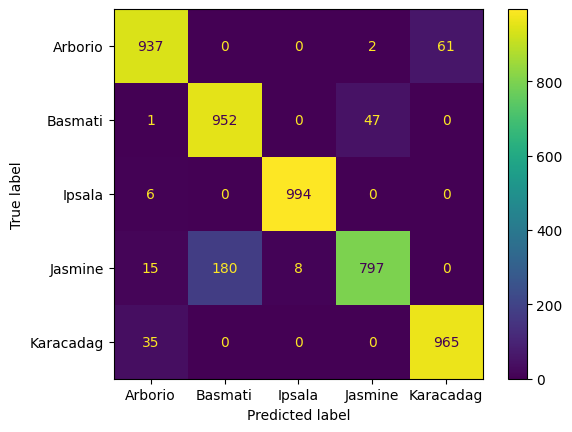

In [4]:
print('KNN')
clf = joblib.load('./objects/knn.pkl')
y_pred = clf.predict(X)
print(f'Accuracy: {accuracy_score(y, y_pred)}')
disp = ConfusionMatrixDisplay.from_predictions(y, y_pred, labels=clf.classes_)
plt.show()

SVM
Accuracy: 0.9316


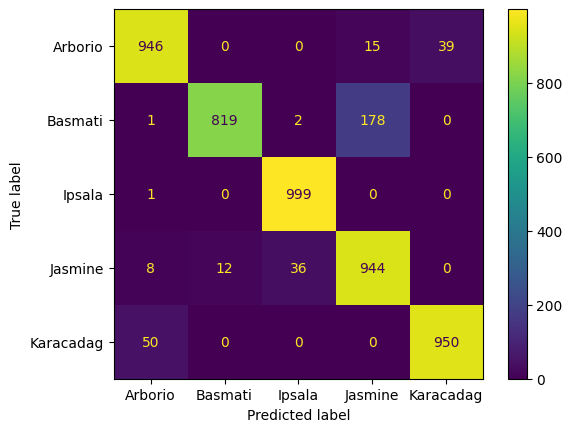

In [5]:
print('SVM')
clf = joblib.load('./objects/svm.pkl')
y_pred = clf.predict(X)
print(f'Accuracy: {accuracy_score(y, y_pred)}')
disp = ConfusionMatrixDisplay.from_predictions(y, y_pred, labels=clf.classes_)
plt.show()

Perceptron
Accuracy: 0.9366


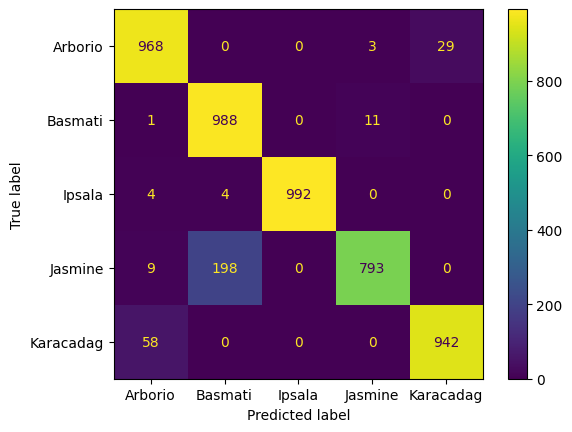

In [6]:
print('Perceptron')
clf = joblib.load('./objects/perceptron.pkl')
y_pred = clf.predict(X)
print(f'Accuracy: {accuracy_score(y, y_pred)}')
disp = ConfusionMatrixDisplay.from_predictions(y, y_pred, labels=clf.classes_)
plt.show()

Log loss
Accuracy: 0.9222


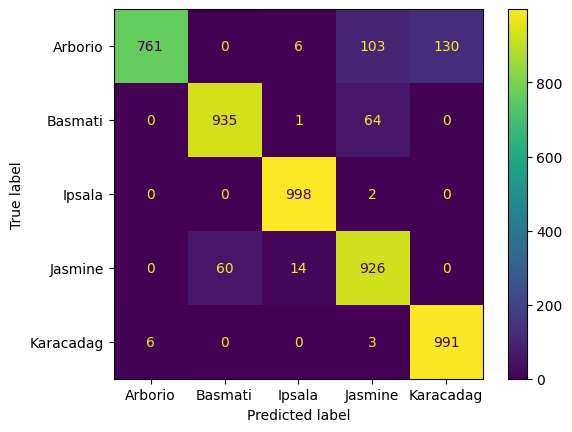

In [7]:
print('Log loss')
clf = joblib.load('./objects/log_loss.pkl')
y_pred = clf.predict(X)
print(f'Accuracy: {accuracy_score(y, y_pred)}')
disp = ConfusionMatrixDisplay.from_predictions(y, y_pred, labels=clf.classes_)
plt.show()

From these results, I notice that Jasmine rice tends to be confused with Basmati rice and sometimes Arborio is confused with Karacadag but not the other way around.